# jajajaj

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from smoothing_methods import plot_lc, plot_subset, smooth_lc, shift_phase

### funcion plot

In [4]:
DATA_DIR = 'NGC_6426V/processed'
data_file = f'{DATA_DIR}/lc57_processed.data'

#NGC_6426V/processed/lc57_processed.data

In [5]:
lc_data = pd.read_csv(data_file, index_col ="file", delim_whitespace=True)

lc_data

/tmp/ipykernel_18378/1537906715.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc_data = pd.read_csv(data_file, index_col ="file", delim_whitespace=True)


,HJD,Flux,MagInstr,calSNR,JD,UT,EXPTIME,FILTER
file,,,,,,,,
202505060414o.fit,401.830477,-1572.3089,22.414914,0.8697,401.826493,07:49:04,130.0,V
202505060416o.fit,401.833938,-1375.5927,22.272734,0.8224,401.829954,07:54:03,130.0,V
202505060419o.fit,401.840153,-1455.0861,22.681291,0.8700,401.836169,08:02:35,180.0,V
202505060421o.fit,401.844170,-1658.3392,22.836792,0.9081,401.840185,08:08:22,180.0,V
202505060423o.fit,401.848175,-1742.0577,22.907936,0.9192,401.844190,08:14:08,180.0,V
...,...,...,...,...,...,...,...,...
202505161431o.fit,411.976220,-647.0468,22.219215,0.5697,411.971713,11:17:46,180.0,V
202505161433o.fit,411.980224,-924.7208,22.356911,0.6694,411.975718,11:23:32,180.0,V
202505161435o.fit,411.984229,-746.5203,22.266561,0.6001,411.979722,11:29:18,180.0,V


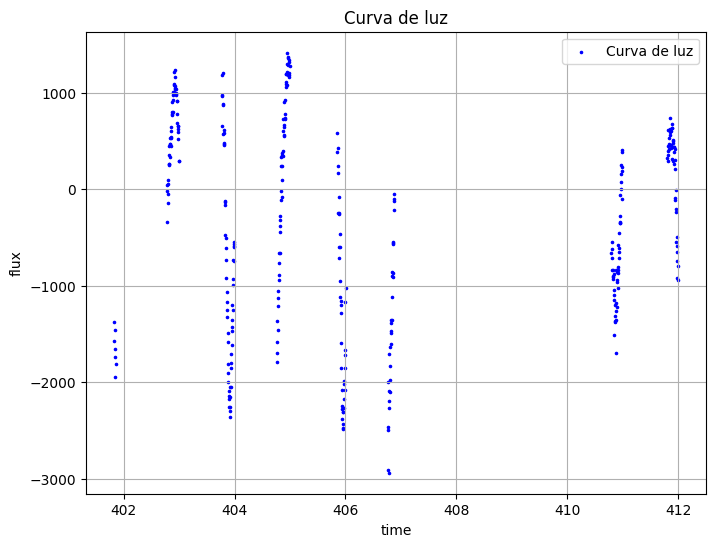

In [6]:
plot_lc(lc_data['HJD'], lc_data['Flux'])

# exploramos calSNR

In [7]:
print(lc_data["calSNR"].describe())

count    344.000000
mean       0.582428
std        0.257596
min        0.010700
25%        0.395125
50%        0.611800
75%        0.803400
max        0.959200
Name: calSNR, dtype: float64


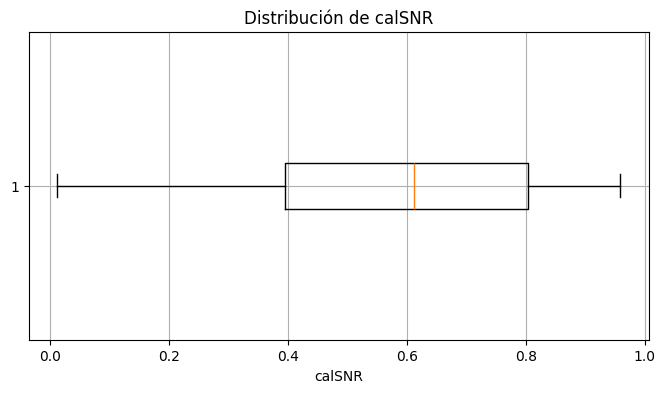

In [8]:
plt.figure(figsize=(8, 4))
plt.boxplot(lc_data["calSNR"], vert=False)
plt.title("Distribución de calSNR")
plt.xlabel("calSNR")
plt.grid(True)
plt.show()

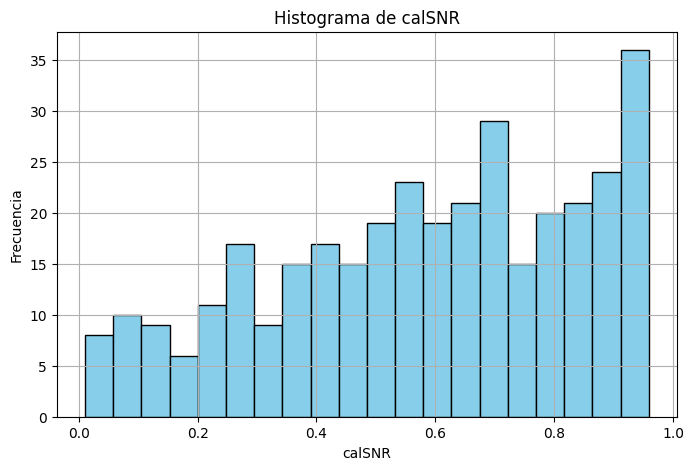

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(lc_data["calSNR"], bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma de calSNR")
plt.xlabel("calSNR")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [10]:
float(lc_data[lc_data["calSNR"] > 0.3].count()[0] / lc_data["calSNR"].count()) * 100

/tmp/ipykernel_18378/434897737.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  float(lc_data[lc_data["calSNR"] > 0.3].count()[0] / lc_data["calSNR"].count()) * 100


82.26744186046511

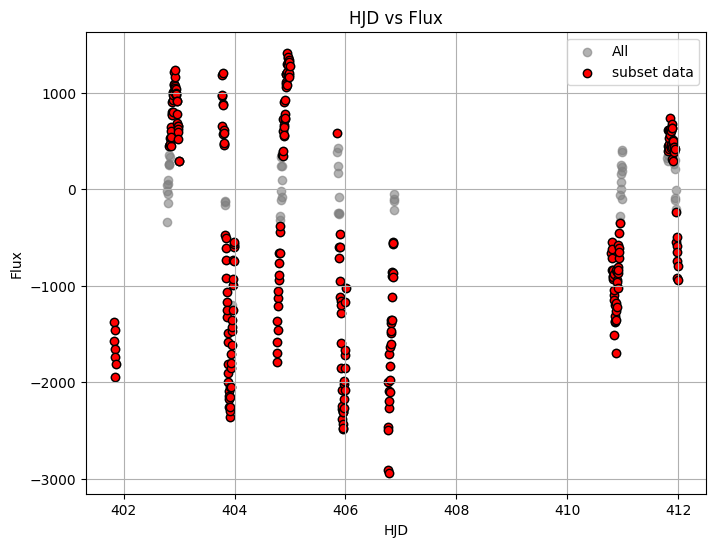

In [11]:
# Puntos con calSNR < 0.3
subset = lc_data[lc_data["calSNR"] > 0.3]

plot_subset("HJD", "Flux", lc_data, subset)

# En fase

In [12]:
lc_data_phased = lc_data.copy(deep=True)

In [13]:
# en fase 
phase = 0.407047
shift = 0
#shift = -0.42

lc_data['Phased'] = (lc_data["HJD"]+shift) % phase

lc_data

,HJD,Flux,MagInstr,calSNR,JD,UT,EXPTIME,FILTER,Phased
file,,,,,,,,,
202505060414o.fit,401.830477,-1572.3089,22.414914,0.8697,401.826493,07:49:04,130.0,V,0.075088
202505060416o.fit,401.833938,-1375.5927,22.272734,0.8224,401.829954,07:54:03,130.0,V,0.078549
202505060419o.fit,401.840153,-1455.0861,22.681291,0.8700,401.836169,08:02:35,180.0,V,0.084764
202505060421o.fit,401.844170,-1658.3392,22.836792,0.9081,401.840185,08:08:22,180.0,V,0.088781
202505060423o.fit,401.848175,-1742.0577,22.907936,0.9192,401.844190,08:14:08,180.0,V,0.092786
...,...,...,...,...,...,...,...,...,...
202505161431o.fit,411.976220,-647.0468,22.219215,0.5697,411.971713,11:17:46,180.0,V,0.044656
202505161433o.fit,411.980224,-924.7208,22.356911,0.6694,411.975718,11:23:32,180.0,V,0.048660
202505161435o.fit,411.984229,-746.5203,22.266561,0.6001,411.979722,11:29:18,180.0,V,0.052665


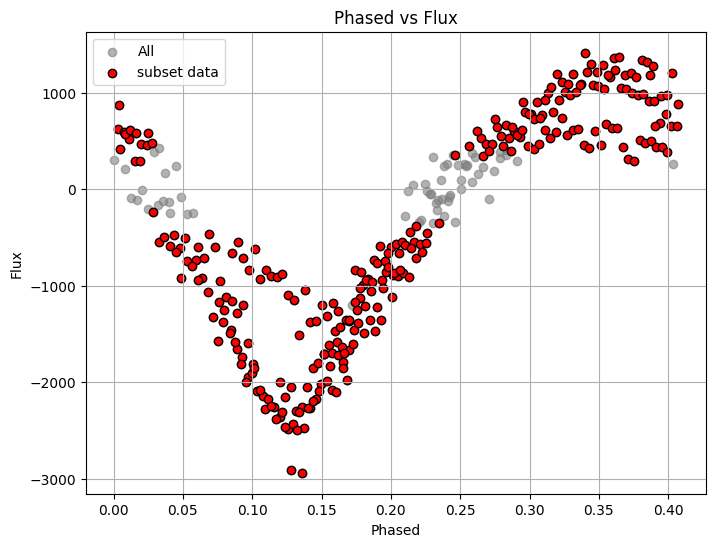

In [14]:
subset = lc_data[lc_data["calSNR"] > 0.3]
plot_subset("Phased", "Flux", lc_data, subset)

## Fase con python

In [15]:
from astropy.timeseries import LombScargle
import numpy as np

# Usamos los valores de tiempo y flujo
time = lc_data['HJD'].values
flux = lc_data['Flux'].values

# Calculamos el periodograma
frequency, power = LombScargle(time, flux).autopower()

# Obtenemos el periodo con la potencia más alta
best_period = 1 / frequency[np.argmax(power)]
print(f"🌀 Mejor periodo estimado: {best_period:.6f} días")

🌀 Mejor periodo estimado: 0.408105 días


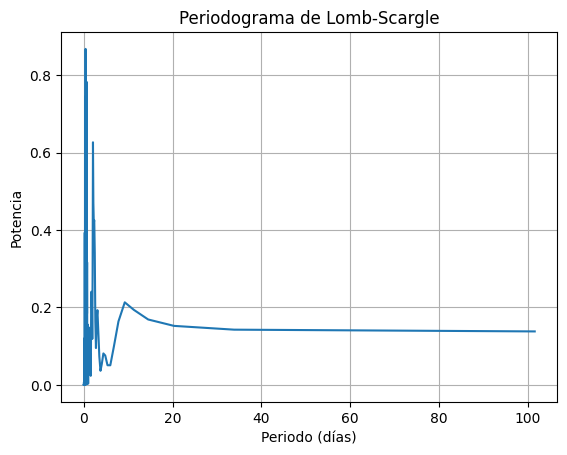

In [16]:
plt.plot(1 / frequency, power)
plt.xlabel("Periodo (días)")
plt.ylabel("Potencia")
plt.title("Periodograma de Lomb-Scargle")
plt.grid(True)
plt.show()

In [17]:
# mi periodo 
#best_period = 0.620313189

In [18]:
# Guardamos la fase en una nueva columna
lc_data['Phased'] = (lc_data['HJD'] % best_period)

### shift phase

In [19]:
#lc_data = shift_phase(lc_data, 0.3)

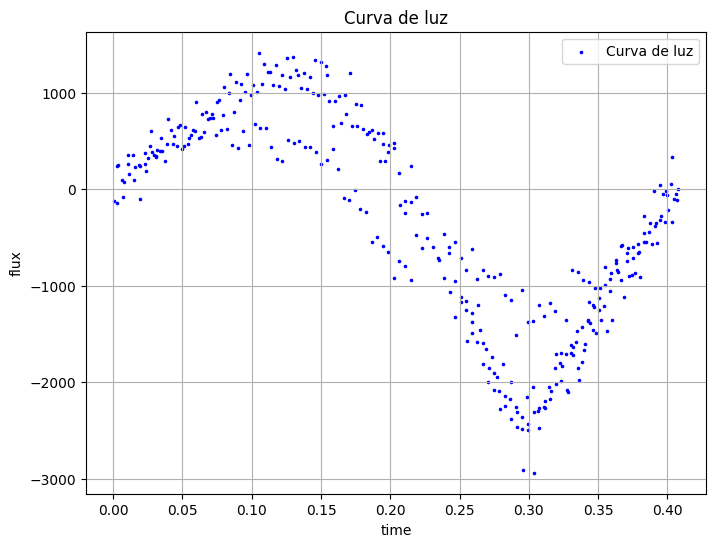

In [20]:
plot_lc(lc_data['Phased'], lc_data['Flux'])

## smoothing curves

In [21]:
#lc_clean = smooth_lc(lc_data, 500)

In [22]:
#lc_clean = smooth_lc(lc_clean, 400)

In [23]:
# sort by phase
lc_sorted = lc_data.sort_values(by='Phased')
lc_sorted

,HJD,Flux,MagInstr,calSNR,JD,UT,EXPTIME,FILTER,Phased
file,,,,,,,,,
202505111107o.fit,406.881135,-123.5397,21.871382,0.1032,406.876875,09:01:22,160.0,V,0.000710
202505070492o.fit,402.801840,-139.7604,21.877569,0.1512,402.797801,07:07:30,160.0,V,0.002463
202505090798o.fit,404.842844,242.3424,21.740449,0.2342,404.838692,08:06:23,160.0,V,0.002943
202505151252o.fit,410.964946,248.6509,21.866206,0.1418,410.960486,11:01:36,180.0,V,0.003474
202505070494o.fit,402.805880,91.5063,21.792528,0.0442,402.801840,07:13:19,160.0,V,0.006503
...,...,...,...,...,...,...,...,...,...
202505151248o.fit,410.956856,-339.5705,22.084701,0.2564,410.952396,10:49:57,180.0,V,0.403489
202505111105o.fit,406.877095,-106.4699,21.864909,0.0997,406.872836,08:55:33,160.0,V,0.404775
202505070490o.fit,402.797801,-45.9478,21.842266,0.0688,402.793762,07:01:41,160.0,V,0.406528


### rolling function
- **`min_period`** Minimum number of observations in window required to have a value; otherwise, result is `np.nan`.

In [24]:
# smooth by median
smooth_flux = lc_sorted['Flux'].rolling(window=25, min_periods=1, center=True).median()
np.array(smooth_flux)

array([  156.1492 ,   195.259  ,   234.3688 ,   195.259  ,   234.3688 ,
         235.16355,   234.3688 ,   235.16355,   235.9583 ,   239.15035,
         242.3424 ,   245.49665,   248.6509 ,   254.1994 ,   259.0998 ,
         264.7481 ,   319.4439 ,   336.8517 ,   336.8517 ,   347.8865 ,
         350.8221 ,   350.8221 ,   359.2454 ,   376.4287 ,   387.2685 ,
         397.5195 ,   398.5907 ,   403.1382 ,   413.3183 ,   449.9959 ,
         451.7242 ,   453.345  ,   465.1934 ,   466.681  ,   466.681  ,
         471.6282 ,   527.7696 ,   530.9656 ,   533.3581 ,   537.2325 ,
         549.7186 ,   562.56   ,   595.1049 ,   606.2057 ,   610.0471 ,
         606.2057 ,   606.2057 ,   610.0471 ,   612.8842 ,   646.7872 ,
         646.7872 ,   621.7927 ,   646.7872 ,   731.9775 ,   731.9775 ,
         737.0852 ,   741.7648 ,   741.7648 ,   769.5738 ,   776.4744 ,
         769.5738 ,   776.4744 ,   776.5281 ,   776.4744 ,   796.7005 ,
         805.4642 ,   805.4642 ,   907.2411 ,   920.4489 ,   920

In [25]:
# compute residuals
residuals = lc_sorted['Flux'] - smooth_flux
np.array(residuals)

array([-2.7968890e+02, -3.3501940e+02,  7.9736000e+00,  5.3391900e+01,
       -1.4286250e+02, -3.1252635e+02, -1.6441880e+02,  2.3936250e+01,
        1.2163590e+02, -8.3001150e+01,  1.0847970e+02, -1.4733805e+02,
       -1.4282100e+01,  0.0000000e+00, -2.3141500e+01, -3.6214040e+02,
       -5.4695800e+01,  3.9577000e+01, -1.4309010e+02, -2.8442600e+01,
        1.0252290e+02,  2.5226560e+02,  2.8023100e+01, -1.7183300e+01,
       -5.0416800e+01, -4.9633000e+01,  4.5475000e+00, -4.5475000e+00,
        1.1445130e+02, -5.2476400e+01, -1.6264610e+02,  1.3336000e+01,
        2.6528370e+02,  1.5223750e+02,  4.9472000e+00,  7.8090400e+01,
       -7.6045400e+01,  1.1842910e+02,  1.3153140e+02, -1.2391420e+02,
       -9.9722700e+01,  8.4227200e+01, -1.2991150e+02, -7.5240100e+01,
       -4.7487100e+01,  3.8414000e+00,  0.0000000e+00,  2.9107600e+02,
       -7.9526100e+01, -1.0955470e+02,  1.2974090e+02, -2.6687800e+01,
        1.4991330e+02,  0.0000000e+00,  9.7873000e+00,  3.9389200e+01,
      

In [26]:
# delete outliers by distance
mask = residuals.abs() < 400
lc_clean = lc_sorted[mask]

lc_clean

,HJD,Flux,MagInstr,calSNR,JD,UT,EXPTIME,FILTER,Phased
file,,,,,,,,,
202505111107o.fit,406.881135,-123.5397,21.871382,0.1032,406.876875,09:01:22,160.0,V,0.000710
202505070492o.fit,402.801840,-139.7604,21.877569,0.1512,402.797801,07:07:30,160.0,V,0.002463
202505090798o.fit,404.842844,242.3424,21.740449,0.2342,404.838692,08:06:23,160.0,V,0.002943
202505151252o.fit,410.964946,248.6509,21.866206,0.1418,410.960486,11:01:36,180.0,V,0.003474
202505070494o.fit,402.805880,91.5063,21.792528,0.0442,402.801840,07:13:19,160.0,V,0.006503
...,...,...,...,...,...,...,...,...,...
202505151248o.fit,410.956856,-339.5705,22.084701,0.2564,410.952396,10:49:57,180.0,V,0.403489
202505111105o.fit,406.877095,-106.4699,21.864909,0.0997,406.872836,08:55:33,160.0,V,0.404775
202505070490o.fit,402.797801,-45.9478,21.842266,0.0688,402.793762,07:01:41,160.0,V,0.406528


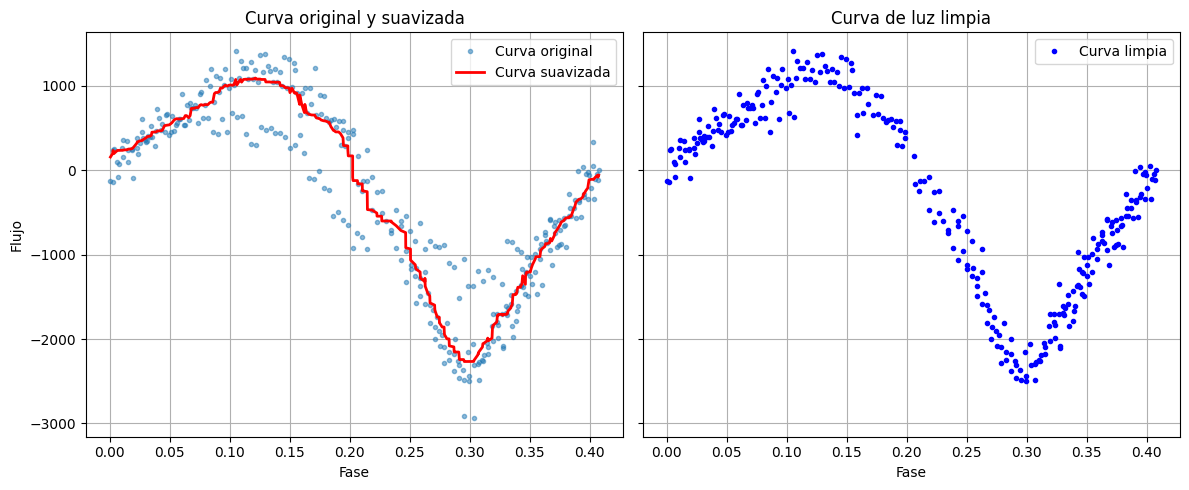

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot 1: original + smoothed
axs[0].plot(lc_sorted['Phased'], lc_sorted['Flux'], '.', label='Curva original', alpha=0.5)
axs[0].plot(lc_sorted['Phased'], smooth_flux, '-', color='red', linewidth=2, label='Curva suavizada')
axs[0].set_title('Curva original y suavizada')
axs[0].set_xlabel('Fase')
axs[0].set_ylabel('Flujo')
axs[0].legend()
axs[0].grid(True)

# Gráfico 2: Curva limpia
axs[1].plot(lc_clean['Phased'], lc_clean['Flux'], '.', label='Curva limpia', color='blue')
axs[1].set_title('Curva de luz limpia')
axs[1].set_xlabel('Fase')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()